# Assignment 1 - Computational Mathematics
# Task 1: Graphical method and absolute error

In [1]:
# Importing necessary libraries
%pip install scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

Note: you may need to restart the kernel to use updated packages.


# Function definition


In [4]:
def f(x):
    return x**3 - 2*x**2 - 5

# Task 1.1: Plot the graph of f(x) in the range x \in [1, 4]


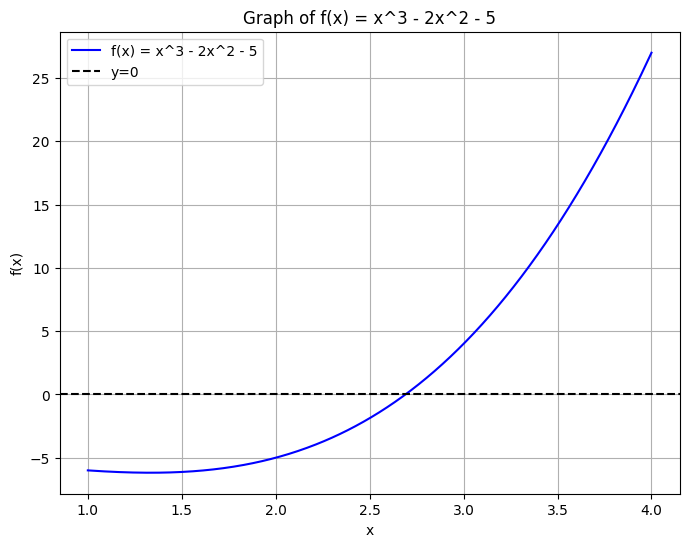

In [6]:
x_vals = np.linspace(1, 4, 500)  # Generate 500 points between 1 and 4
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='f(x) = x^3 - 2x^2 - 5', color='blue')
plt.axhline(0, color='black', linestyle='--', label='y=0')
plt.title('Graph of f(x) = x^3 - 2x^2 - 5')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

# Task 1.2: Approximate root from the graph
# (Based on the graph, approximate where f(x) crosses the x-axis, e.g., x ~ 3)

In [110]:
approx_root = 2.5 

# Task 1.3: Calculate f(approx_root)

In [111]:
approx_value = f(approx_root)
print(f"Approximate root from the graph: x = {approx_root}")
print(f"Value of f(x) at the approximate root: f({approx_root}) = {approx_value}")

Approximate root from the graph: x = 2.5
Value of f(x) at the approximate root: f(2.5) = -1.875


# Task 1.4: Calculate the true root and absolute error
# Using a numerical method to find the exact root in the interval [1, 4]

In [112]:
result = root_scalar(f, bracket=[1, 4], method='brentq')
true_root = result.root
absolute_error = abs(true_root - approx_root)

print(f"True root (using numerical method): x = {true_root}")
print(f"Absolute error: |{true_root} - {approx_root}| = {absolute_error}")

True root (using numerical method): x = 2.6906474480284124
Absolute error: |2.6906474480284124 - 2.5| = 0.19064744802841238


# Explanation of the graphical method's approximation

In [1]:
explanation = '''\
The graphical method provides an approximate value for the root by visually identifying where the curve intersects the x-axis.
However, this method is limited by the resolution of the graph and the accuracy of human estimation.
It cannot provide the exact root because the intersection point may fall between plotted points, and slight inaccuracies in the graph scale can affect the estimate.'''

print("\nExplanation of the graphical method's approximation:\n")
print(explanation)


Explanation of the graphical method's approximation:

The graphical method provides an approximate value for the root by visually identifying where the curve intersects the x-axis.
However, this method is limited by the resolution of the graph and the accuracy of human estimation.
It cannot provide the exact root because the intersection point may fall between plotted points, and slight inaccuracies in the graph scale can affect the estimate.


# Task 2: Comparison of root finding methods.

# Function definition for Task 2

In [68]:
def g(x):
    return np.exp(x) - 2 * x - 3

# Task 2.1 (a): Bisection Method

In [3]:
def bisection_method(func, a, b, tol=1e-6):
    iterations = 0
    while abs(b - a) > tol:
        c = (a + b) / 2
        if func(c) == 0 or abs(b - a) < tol:
            break
        if func(a) * func(c) < 0:
            b = c
        else:
            a = c
        iterations += 1
    return c, iterations

# Task 2.1 (b): Secant Method

In [70]:
def secant_method(func, x0, x1, tol=1e-6):
    iterations = 0
    while abs(x1 - x0) > tol:
        f_x0 = func(x0)
        f_x1 = func(x1)
        if f_x1 - f_x0 == 0:
            break
        x_temp = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        x0, x1 = x1, x_temp
        iterations += 1
    return x1, iterations

# Interval for root finding
a, b = 0, 2

# Bisection Method
root_bisection, iter_bisection = bisection_method(g, a, b)
print(f"Root found by Bisection Method: x = {root_bisection}")
print(f"Number of iterations (Bisection): {iter_bisection}")

# Secant Method
x0, x1 = 0, 2
root_secant, iter_secant = secant_method(g, x0, x1)
print(f"Root found by Secant Method: x = {root_secant}")
print(f"Number of iterations (Secant): {iter_secant}")

Root found by Bisection Method: x = 1.9239377975463867
Number of iterations (Bisection): 21
Root found by Secant Method: x = 1.923938750346989
Number of iterations (Secant): 6


# Task 2.3: Calculate relative errors

In [71]:
true_root = root_scalar(g, bracket=[a, b], method='brentq').root

rel_error_bisection = abs((true_root - root_bisection) / true_root)
rel_error_secant = abs((true_root - root_secant) / true_root)

print(f"Relative error (Bisection): {rel_error_bisection}")
print(f"Relative error (Secant): {rel_error_secant}")


Relative error (Bisection): 4.952337970561575e-07
Relative error (Secant): 5.767111300247521e-13


# Task 2.4: Efficiency explanation

In [72]:
efficiency_explanation = '''\
The Secant Method typically converges faster than the Bisection Method because it uses a linear approximation based on two points.
However, the Secant Method requires a good initial guess and may fail if the function is not well-behaved in the interval.
The Bisection Method is more robust but slower, as it systematically reduces the interval size.'''

print("\nEfficiency of root-finding methods:\n")
print(efficiency_explanation)



Efficiency of root-finding methods:

The Secant Method typically converges faster than the Bisection Method because it uses a linear approximation based on two points.
However, the Secant Method requires a good initial guess and may fail if the function is not well-behaved in the interval.
The Bisection Method is more robust but slower, as it systematically reduces the interval size.


# Task 3: Newton-Raphson Method and Error Estimation

# Function definition for Task 3

In [6]:
def h(x):
    return x**2 - 3*x + 2

def h_prime(x):
    return 2*x - 3

# Task 3.1: Newton-Raphson Method

In [12]:
def newton_raphson_method(func, func_prime, x0, tol=1e-6, max_iter=100):
    iterations = []
    for i in range(max_iter):
        f_x = func(x0)
        f_prime_x = func_prime(x0)
        if f_prime_x == 0:
            raise ValueError("Derivative is zero. No solution found.")
        x1 = x0 - f_x / f_prime_x
        abs_error = abs(x1 - x0)
        rel_error = abs(abs_error / x1)
        iterations.append((i + 1, x0, f_x, abs_error, rel_error))
        if abs_error < tol:
            break
        x0 = x1
    return x1, iterations

# Initial guess and parameters
x0 = 2.5
root_newton, iteration_data = newton_raphson_method(h, h_prime, x0)

# Printing results
print("Root found by Newton-Raphson Method: x = {:.6f}".format(root_newton))
print("\nIteration data (Newton-Raphson):")
print("Iter\tCurrent Guess\t\tf(x)\t\tAbsolute Error\tRelative Error")
for iter_num, guess, f_val, abs_err, rel_err in iteration_data:
    print(f"{iter_num}\t{guess:.6f}\t\t{f_val:.6e}\t\t{abs_err:.6e}\t{rel_err:.6e}")

Root found by Newton-Raphson Method: x = 2.000000

Iteration data (Newton-Raphson):
Iter	Current Guess		f(x)		Absolute Error	Relative Error
1	2.500000		7.500000e-01		3.750000e-01	1.764706e-01
2	2.125000		1.406250e-01		1.125000e-01	5.590062e-02
3	2.012500		1.265625e-02		1.234756e-02	6.173310e-03
4	2.000152		1.524623e-04		1.524158e-04	7.620790e-05
5	2.000000		2.323057e-08		2.323057e-08	1.161529e-08


# Task 3.2: Plot convergence graph

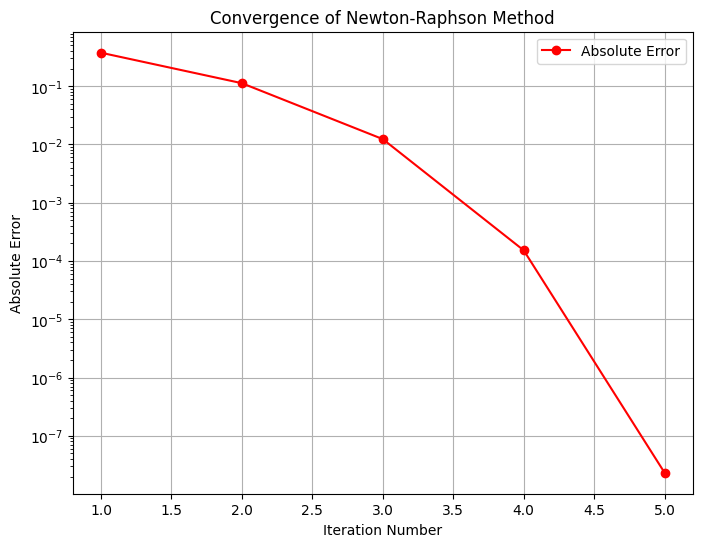

In [75]:
abs_errors = [row[3] for row in iteration_data]
iterations = [row[0] for row in iteration_data]

plt.figure(figsize=(8, 6))
plt.plot(iterations, abs_errors, marker='o', color='red', label='Absolute Error')
plt.title('Convergence of Newton-Raphson Method')
plt.xlabel('Iteration Number')
plt.ylabel('Absolute Error')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()


# Task 3.3: Explanation of convergence

In [76]:
convergence_explanation = '''\
The choice of the initial guess greatly affects the convergence of the Newton-Raphson method.
If the initial guess is close to the true root and the derivative does not approach zero, the method converges quickly.
However, if the initial guess is far from the root or the derivative is near zero, convergence may be slow or fail entirely.
This is why choosing a good starting point is critical for this method.'''

print("\nExplanation of convergence in Newton-Raphson Method:\n")
print(convergence_explanation)



Explanation of convergence in Newton-Raphson Method:

The choice of the initial guess greatly affects the convergence of the Newton-Raphson method.
If the initial guess is close to the true root and the derivative does not approach zero, the method converges quickly.
However, if the initial guess is far from the root or the derivative is near zero, convergence may be slow or fail entirely.
This is why choosing a good starting point is critical for this method.


# Task 4: Muller's Method and Complex Roots.

# 4.1. Find one of the roots (including complex roots) using Muller's method



In [77]:
# importing cmath library
# Define the function f(x)
import cmath

def f(x):
    return x**3 + x**2 + x + 1

# initial approximations 
x0 = -1
x1 = 0
x2 = 1


In [78]:
# Define the muller_method()
def muller_method(f, x0, x1, x2, tol):
    i = 0
    # Iterative root approximation by Muller's method 
    while(abs(f(x2)) > tol):
        q = (x2 - x1) / (x1 - x0)
        a = q * f(x2) - q * (1 + q) * f(x1) + q**2 * f(x0)
        b = (2 * q + 1) * f(x2) - (q**2 + 2*q + 1) * f(x1) + q**2 * f(x0)
        c = (1 + q) * f(x2)

        discriminant = cmath.sqrt(b**2 - 4*a*c)
        # formula 
        x3_1 = x2 - (x2 - x1) * (2 * c) / (b + discriminant)
        # formula 
        x3_2 = x2 - (x2 - x1) * (2 * c) / (b - discriminant)
        if abs(f(x3_2)) > abs(f(x3_1)):
            x3 = x3_1
        else: 
            x3 = x3_2
        # Result is real number
        if x3.imag == 0j:
            x3 = x3.real
        # Stop condition 
        if abs(x3 - x2) < tol: 
            return x3
        # When root is complex double, check complex conjugate
        if isinstance(x3, complex):
            conjugate = complex(x3.real, -x3.imag)
            if abs(f(conjugate)) < tol:
                print("and \t{:.4f}".format(conjugate)+"\t{:.4f}".format(f(conjugate)))
        x0, x1, x2 = x1, x2, x3
        i =+ 1
    return x3

# 4.2. Calculate the absolute error between the calculated value of f(x) and 0

In [79]:
# Finding the root using the Muller's method 

root = muller_method(f, x0, x1, x2, 1e-8)
print("Approximation root using Muller's method:", root)

# Calculate the error 

actual_root = -1
error = abs(actual_root - root)
print("Absolute Error:", error)


Approximation root using Muller's method: -1.0
Absolute Error: 0.0


# 4.3. Check the result by substituting the found root value into the function


In [80]:
print(f"f({root}) = {f(root)}")

f(-1.0) = 0.0


# Task 5: Error estimation when using False position method.


# 5.1. Define the function f(x) & False Position method implementation

In [81]:
def f(x):
    return x**2 - 2*x

def false_position_method(f, a, b, tol):
    # Data checking
    if f(a) * f(b) >= 0:
        print("Invalid initial values. f(a) & f(b) should have different signs.")
        return None
    c = a
    absolute_errors = []  # List to store absolute errors
    i = 0
    while abs(f(c)) > tol:
        i += 1
        # Compute the new approximation using the False Position formula
        c = b - f(b) * (b - a) / (f(b) - f(a))
        
        # Calculate absolute error
        absolute_error = abs(c - 2)  # True root is x = 2
        absolute_errors.append(absolute_error)
        
        # Update the interval
        if f(a) * f(c) < 0:
            b = c 
        else: 
            a = c
    
    return c, absolute_errors, i


# 5.2. Find the root of func. f(x) = x^2 - 2^x with the interval [1, 3] with tolerance of 1e-8  

In [82]:

# Apply False Position method
root, absolute_errors, iterations = false_position_method(f, 1, 3, 1e-8)

# Calculate relative error
relative_error = [abs(i / 2) for i in absolute_errors]

# Print results
print(f"Root: {root}")
print(f"Absolute Error: {absolute_errors}")
print(f"Relative Error: {relative_error}")


Root: 1.9999999982792167
Absolute Error: [0.5, 0.19999999999999996, 0.0714285714285714, 0.024390243902439046, 0.008196721311475308, 0.002739726027397138, 0.000914076782449591, 0.0003047851264856849, 0.00010160536476333526, 3.3869602032110535e-05, 1.1289994806595871e-05, 3.7633457647956448e-06, 1.2544501619693449e-06, 4.1815022888691544e-07, 1.393834290208673e-07, 4.646114515338695e-08, 1.548704875453666e-08, 5.162349658860421e-09, 1.7207832936350087e-09]
Relative Error: [0.25, 0.09999999999999998, 0.0357142857142857, 0.012195121951219523, 0.004098360655737654, 0.001369863013698569, 0.0004570383912247955, 0.00015239256324284245, 5.080268238166763e-05, 1.6934801016055268e-05, 5.6449974032979355e-06, 1.8816728823978224e-06, 6.272250809846724e-07, 2.0907511444345772e-07, 6.969171451043366e-08, 2.3230572576693476e-08, 7.74352437726833e-09, 2.5811748294302106e-09, 8.603916468175044e-10]


# 5.3. Printing the abs. & relative errors

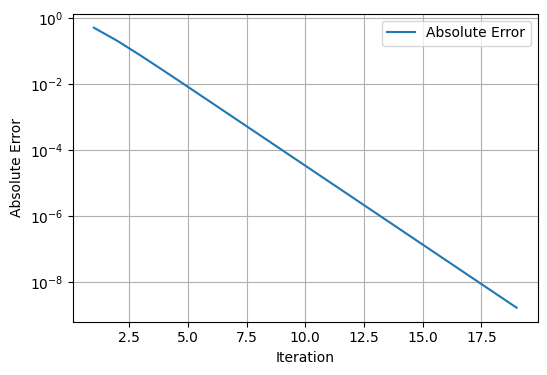

In [83]:

# Plot the absolute error as a function of iteration number
x = np.arange(1, len(absolute_errors) + 1)
plt.figure(figsize=(6, 4))
plt.plot(x, absolute_errors, label="Absolute Error")
plt.xlabel("Iteration")
plt.ylabel("Absolute Error")
plt.yscale("log")
plt.grid(True)
plt.legend()
plt.show()


# Task 6: Iteration method and errors.

Define the original function f(x), 
Define the iteration function g(x), 
Initial guess and settings,
Perform the iterations and calculate errors.


In [84]:
def f(x):
    return np.pow(x, 2) - 6 * x + 5

def g(x):
    return 1 / (2 * x - 6)

x0 = 0.5
iterations = 10
# The true root closest to x0
true_root = 1  

x_values = [x0]
errors = [abs(x0 - true_root)]

for i in range(1, iterations):
    x_new = g(x_values[i-1])
    x_values.append(x_new)
    error = abs(x_new - true_root)
    errors.append(error)


# 6.1. Output the results

In [85]:
for i in range(iterations):
    print(f"Iteration {i+1}: x = {x_values[i]}, Absolute Error = {errors[i]}")


Iteration 1: x = 0.5, Absolute Error = 0.5
Iteration 2: x = -0.2, Absolute Error = 1.2
Iteration 3: x = -0.15625, Absolute Error = 1.15625
Iteration 4: x = -0.15841584158415842, Absolute Error = 1.1584158415841583
Iteration 5: x = -0.15830721003134796, Absolute Error = 1.158307210031348
Iteration 6: x = -0.15831265508684864, Absolute Error = 1.1583126550868486
Iteration 7: x = -0.15831238214959145, Absolute Error = 1.1583123821495915
Iteration 8: x = -0.15831239583074205, Absolute Error = 1.158312395830742
Iteration 9: x = -0.15831239514496578, Absolute Error = 1.1583123951449659
Iteration 10: x = -0.15831239517934076, Absolute Error = 1.1583123951793408


# 6.2. Plotting the error vs. iterations

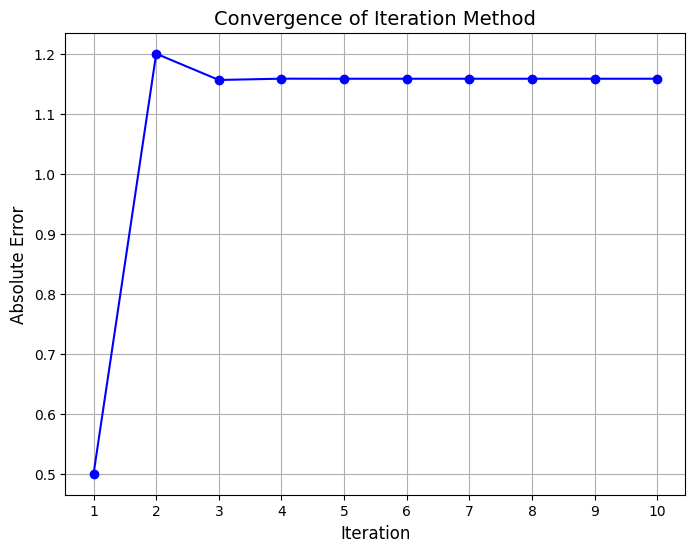

In [86]:


plt.figure(figsize=(8, 6))
plt.plot(range(1, iterations + 1), errors, marker='o', linestyle='-', color='b')
plt.title('Convergence of Iteration Method', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Absolute Error', fontsize=12)
plt.grid(True)
plt.xticks(range(1, iterations + 1))
plt.show()
